In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pingouin as pg
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from bioinfokit.analys import stat

In [2]:
import pandas as pd
import os
working_directory = os.getcwd()
print(working_directory)

/home/jovyan/SERAY-PULLUK-2178-FINAL


In [3]:
path = working_directory + '/diabetes.csv'
df = pd.read_csv(path)

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
#REPLACING MISSING VALUES WITH MEDIAN OF CORRESPONDING ATTRIBUTE BASED ON OUTCOME RESULT (1 OR 0)

In [6]:
df = df[df['Glucose'] != 0.0]
(Negative, Positive) = df.groupby('Outcome')['Glucose'].median()
print(Negative, Positive)
NegativeG = int('108')
PositiveG = int('141')

107.0 140.0


In [7]:
df.loc[(df['Glucose'] == 0) & (df['Outcome'] == 0),'Glucose']= NegativeG
df.loc[(df['Glucose'] == 0) & (df['Outcome'] == 1),'Glucose']= PositiveG

In [8]:
df = df[df['BloodPressure'] != 0.0]
(Negative, Positive) = df.groupby('Outcome')['BloodPressure'].median()
print(Negative, Positive)
NegativeBP = int('70')
PositiveBP = int('75')

70.0 74.5


In [9]:
df.loc[(df['BloodPressure'] == 0) & (df['Outcome'] == 0),'BloodPressure']=NegativeBP
df.loc[(df['BloodPressure'] == 0) & (df['Outcome'] == 1),'BloodPressure']=PositiveBP

In [10]:
df = df[df['SkinThickness'] != 0.0]
(Negative, Positive) = df.groupby('Outcome')['SkinThickness'].median()
print(Negative, Positive)
NegativeST = int('27')
PositiveST = int('33')

27.0 32.0


In [11]:
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 0),'SkinThickness']=NegativeST
df.loc[(df['SkinThickness'] == 0) & (df['Outcome'] == 1),'SkinThickness']=PositiveST

In [12]:
df = df[df['BMI'] != 0.0]
(Negative, Positive) = df.groupby('Outcome')['BMI'].median()
print(Negative, Positive)
NegativeBMI = int('31')
PositiveBMI = int('35')

30.9 34.6


In [13]:
df.loc[(df['BMI'] == 0) & (df['Outcome'] == 0),'BMI']=NegativeBMI
df.loc[(df['BMI'] == 0) & (df['Outcome'] == 1),'BMI']=PositiveBMI

In [14]:
df = df[df['DiabetesPedigreeFunction'] != 0.0]
(Negative, Positive) = df.groupby('Outcome')['DiabetesPedigreeFunction'].median()
print(Negative, Positive)
NegativeDPF = int(0.336)
PositiveDPF = int(0.449)

0.368 0.542


In [15]:
df.loc[(df['DiabetesPedigreeFunction'] == 0) & (df['Outcome'] == 0),'DiabetesPedigreeFunction']=NegativeDPF
df.loc[(df['DiabetesPedigreeFunction'] == 0) & (df['Outcome'] == 1),'DiabetesPedigreeFunction']=PositiveDPF

In [16]:
#NO 0 MINIMUM FOR ATTRIBUTES (EXCLUDING PREGNANCIES & INSULIN)
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   532.000000  532.000000     532.000000     532.000000  532.000000   
mean      3.516917  121.030075      71.505639      29.182331  114.988722   
std       3.312036   30.999226      12.310253      10.523878  123.007555   
min       0.000000   56.000000      24.000000       7.000000    0.000000   
25%       1.000000   98.750000      64.000000      22.000000    0.000000   
50%       2.000000  115.000000      72.000000      29.000000   91.500000   
75%       5.000000  141.250000      80.000000      36.000000  165.250000   
max      17.000000  199.000000     110.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  532.000000                532.000000  532.000000  532.000000  
mean    32.890226                  0.502966   31.614662    0.332707  
std      6.881109                  0.344546   10.761584    0.471626  
min     18.200000                  0.085000   21.000000    0.000000  
25%     27.875000                  0.258750   23.000000    0.000000  
50%     32.800000                  0.416000   28.000000    0.000000  
75%     36.900000                  0.658500   38.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
df['Outcome'].value_counts()

0    355
1    177
Name: Outcome, dtype: int64

In [18]:
#GRAPHING ATTRIBUTES BASED ON OUTCOME

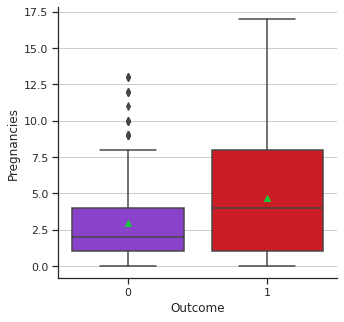

In [19]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Pregnancies", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

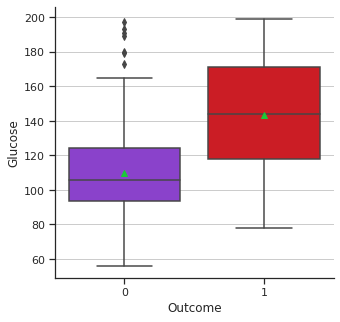

In [20]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Glucose", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

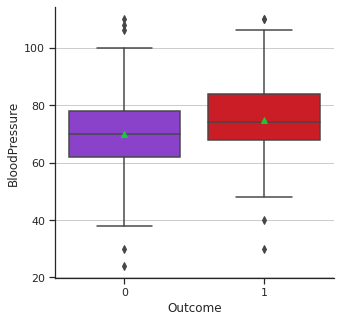

In [21]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="BloodPressure", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

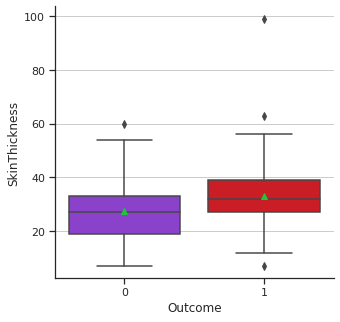

In [22]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="SkinThickness", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

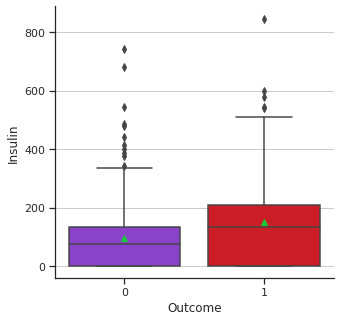

In [23]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Insulin", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

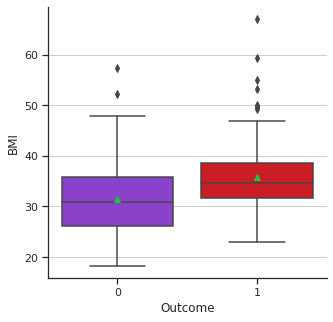

In [24]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="BMI", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

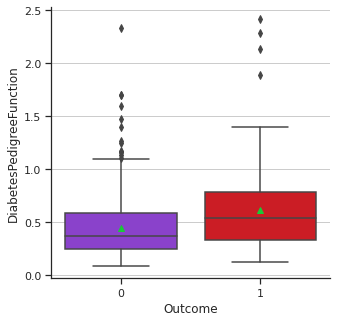

In [25]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="Outcome", y="Age", palette=["m", "r"], data=df, showmeans=True)
sns.despine(offset=0)

In [26]:
#CORRELATION BETWEEN ATTRIBUTES

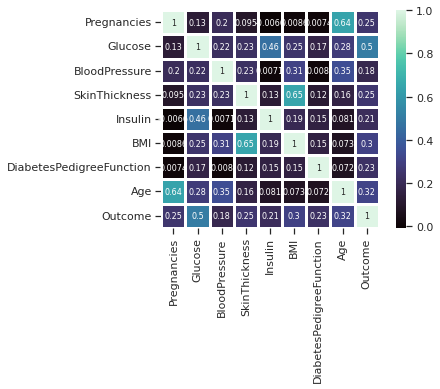

In [27]:
sns.heatmap(df.corr(), cmap="mako", linewidth=3, linecolor='w', square=True, annot_kws={'fontsize':8}, annot = True)

plt.show()

In [28]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None

In [29]:
df.groupby('Outcome').describe()

Pregnancies                                               Glucose  \
              count      mean       std  min  25%  50%  75%   max   count   
Outcome                                                                     
0             355.0  2.926761  2.787227  0.0  1.0  2.0  4.0  13.0   355.0   
1             177.0  4.700565  3.919017  0.0  1.0  4.0  8.0  17.0   177.0   

                                                                  \
               mean        std   min    25%    50%    75%    max   
Outcome                                                            
0        110.016901  24.286886  56.0   93.5  106.0  124.0  197.0   
1        143.118644  31.265043  78.0  118.0  144.0  171.0  199.0   

        BloodPressure                                                       \
                count       mean        std   min   25%   50%   75%    max   
Outcome                                                                      
0               355.0  69.912676  11.903127  24.0  62.0  70.0  78.0  110.0   
1               177.0  74.700565  12.523870  30.0  68.0  74.0  84.0  110.0   

        SkinThickness                                                     \
                count       mean        std  min   25%   50%   75%   max   
Outcome                                                                    
0               355.0  27.290141  10.080343  7.0  19.0  27.0  33.0  60.0   
1               177.0  32.977401  10.395013  7.0  27.0  32.0  39.0  99.0   

        Insulin                                                           BMI  \
          count        mean         std  min  25%    50%    75%    max  count   
Outcome                                                                         
0         355.0   96.574648  105.286169  0.0  0.0   75.0  135.0  744.0  355.0   
1         177.0  151.920904  145.940035  0.0  0.0  135.0  207.0  846.0  177.0   

                                                            \
              mean       std   min   25%   50%   75%   max   
Outcome                                                      
0        31.429577  6.546828  18.2  26.2  30.9  35.8  57.3   
1        35.819774  6.611560  22.9  31.6  34.6  38.5  67.1   

        DiabetesPedigreeFunction                                            \
                           count      mean       std    min     25%    50%   
Outcome                                                                      
0                          355.0  0.446315  0.298781  0.085  0.2405  0.368   
1                          177.0  0.616588  0.398935  0.127  0.3280  0.542   

                          Age                                                \
            75%    max  count       mean        std   min   25%   50%   75%   
Outcome                                                                       
0        0.5845  2.329  355.0  29.222535   9.903406  21.0  22.0  25.0  32.5   
1        0.7870  2.420  177.0  36.412429  10.837355  21.0  27.0  35.0  44.0   

               
          max  
Outcome        
0        81.0  
1        70.0

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

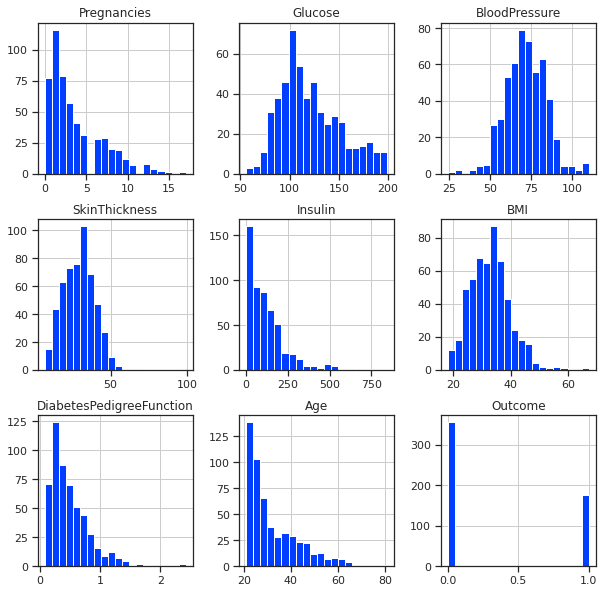

In [30]:
df.hist(bins = 20, figsize = (10,10))

In [31]:
#SHAPIRO TESTS TO SEE IF ATTRIBUTES ARE NORMALLY DISTRIBUTED 

In [32]:
from scipy.stats import shapiro

In [33]:
stat, p = shapiro(df.Pregnancies)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.873, p=0.000
Sample does not look Gaussian (reject H0)


In [34]:
stat, p = shapiro(df.Glucose)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.958, p=0.000
Sample does not look Gaussian (reject H0)


In [35]:
stat, p = shapiro(df.BloodPressure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.001
Sample does not look Gaussian (reject H0)


In [36]:
stat, p = shapiro(df.SkinThickness)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
stat, p = shapiro(df.Insulin)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.819, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
stat, p = shapiro(df.BMI)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)


In [39]:
stat, p = shapiro(df.DiabetesPedigreeFunction)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.845, p=0.000
Sample does not look Gaussian (reject H0)


In [40]:
stat, p = shapiro(df.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.854, p=0.000
Sample does not look Gaussian (reject H0)


In [41]:
#BINNING CONTINIUOUS VARIABLES INTO CATEGORICAL VARIABLES W/ GRAPHS + EQUALITY OF VARIANCE AS THEY'RE NOT NORM DIST

In [42]:
from scipy.stats import levene

In [43]:
min_value = df['Pregnancies'].min()
max_value = df['Pregnancies'].max()
print(min_value)
print(max_value)

0
17


In [44]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 0.  ,  4.25,  8.5 , 12.75, 17.  ])

In [45]:
labels = ['0-4','5-9','10-13','13-17']
df['PregnanciesGroups'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

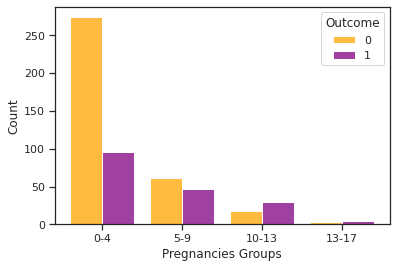

In [46]:
PG = sns.histplot(data=df, x="PregnanciesGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Pregnancies Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [47]:
pg.homoscedasticity(df, dv='BMI', 
                    group='PregnanciesGroups',
                   method='levene')

W      pval  equal_var
levene  2.27204  0.079289       True

In [48]:
min_value = df['Glucose'].min()
max_value = df['Glucose'].max()
print(min_value)
print(max_value)

56
199


In [49]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 56.  ,  91.75, 127.5 , 163.25, 199.  ])

In [50]:
labels = ['44-83','84-122','123-160','161-199']
df['GlucoseGroups'] = pd.cut(df['Glucose'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

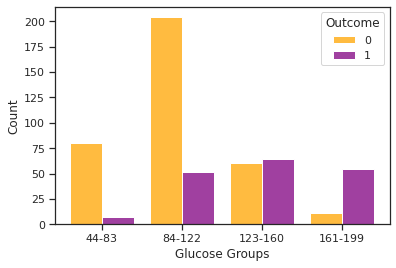

In [51]:
PG = sns.histplot(data=df, x="GlucoseGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Glucose Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [52]:
pg.homoscedasticity(df, dv='BMI', 
                    group='GlucoseGroups',
                   method='levene')

W      pval  equal_var
levene  1.411588  0.238482       True

In [53]:
min_value = df['BloodPressure'].min()
max_value = df['BloodPressure'].max()
print(min_value)
print(max_value)

24
110


In [54]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 24. ,  45.5,  67. ,  88.5, 110. ])

In [55]:
labels = ['24-49','50-73','74-98','99-122']
df['BloodPressureGroups'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

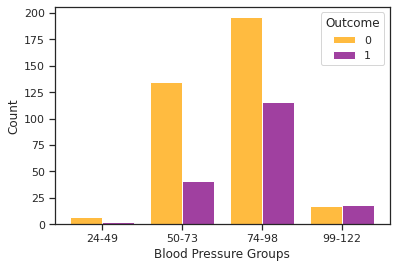

In [56]:
PG = sns.histplot(data=df, x="BloodPressureGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Blood Pressure Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [57]:
pg.homoscedasticity(df, dv='BMI', 
                    group='BloodPressureGroups',
                   method='levene')

W      pval  equal_var
levene  5.367254  0.001202      False

In [58]:
min_value = df['SkinThickness'].min()
max_value = df['SkinThickness'].max()
print(min_value)
print(max_value)

7
99


In [59]:
bins = np.linspace(min_value,max_value,5)
bins

array([ 7., 30., 53., 76., 99.])

In [60]:
labels = ['7-30','31-53','54-76','77-99']
df['SkinThicknessGroups'] = pd.cut(df['SkinThickness'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

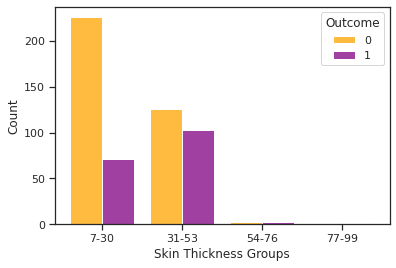

In [61]:
PG = sns.histplot(data=df, x="SkinThicknessGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Skin Thickness Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [62]:
pg.homoscedasticity(df, dv='BMI', 
                    group='SkinThicknessGroups',
                   method='levene')

W      pval  equal_var
levene  1.943987  0.121468       True

In [63]:
min_value = df['Insulin'].min()
max_value = df['Insulin'].max()
print(min_value)
print(max_value)

0
846


In [64]:
bins = np.linspace(min_value,max_value,5)
bins

array([  0. , 211.5, 423. , 634.5, 846. ])

In [65]:
labels = ['0-212','213-423','424-635','636-846']
df['InsulinGroups'] = pd.cut(df['Insulin'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

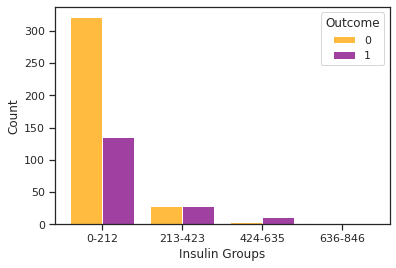

In [66]:
PG = sns.histplot(data=df, x="InsulinGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Insulin Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [67]:
pg.homoscedasticity(df, dv='BMI', 
                    group='InsulinGroups',
                   method='levene')

W      pval  equal_var
levene  0.924542  0.428631       True

In [68]:
min_value = df['BMI'].min()
max_value = df['BMI'].max()
print(min_value)
print(max_value)

18.2
67.1


In [69]:
bins = np.linspace(min_value,max_value,5)
bins

array([18.2  , 30.425, 42.65 , 54.875, 67.1  ])

In [70]:
labels = ['18-30', '31-43', '44-55','56-67']
df['BMIGroups'] = pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

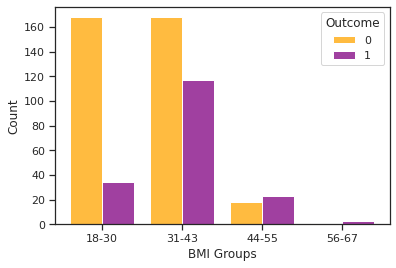

In [71]:
PG = sns.histplot(data=df, x="BMIGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("BMI Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [72]:
min_value = df['DiabetesPedigreeFunction'].min()
max_value = df['DiabetesPedigreeFunction'].max()
print(min_value)
print(max_value)

0.085
2.42


In [73]:
bins = np.linspace(min_value,max_value,5)
bins

array([0.085  , 0.66875, 1.2525 , 1.83625, 2.42   ])

In [74]:
labels = ['0.078-0.6635','0.6636-1.249','1.250-1.8345','1.8346-2.42']
df['DiabetesPedigreeFunctionGroups'] = pd.cut(df['DiabetesPedigreeFunction'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

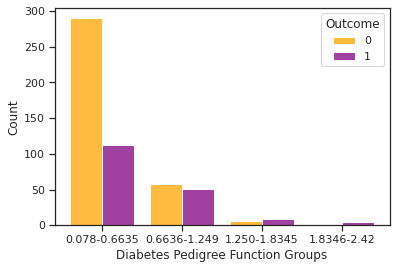

In [75]:
PG = sns.histplot(data=df, x="DiabetesPedigreeFunctionGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Diabetes Pedigree Function Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [76]:
pg.homoscedasticity(df, dv='BMI', 
                    group='DiabetesPedigreeFunctionGroups',
                   method='levene')

W      pval  equal_var
levene  0.239939  0.868488       True

In [77]:
min_value = df['Age'].min()
max_value = df['Age'].max()
print(min_value)
print(max_value)

21
81


In [78]:
bins = np.linspace(min_value,max_value,5)
bins

array([21., 36., 51., 66., 81.])

In [79]:
labels = ['21-36','37-51','52-66','67-81']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Count')

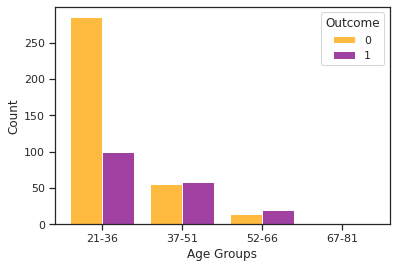

In [80]:
PG = sns.histplot(data=df, x="AgeGroups", hue="Outcome", multiple="dodge", shrink=.8, palette=['orange', 'purple'])
PG.set_xlabel("Age Groups", fontsize = 12)
PG.set_ylabel("Count", fontsize = 12) 

In [81]:
pg.homoscedasticity(df, dv='BMI', 
                    group='AgeGroups',
                   method='levene')

W      pval  equal_var
levene  3.1343  0.025222      False

In [82]:
#T-TESTS BASED ON OUTCOME RESULT

In [83]:
d1 = df[df['Outcome']==1]
d0 = df[df['Outcome']==0]

In [84]:
PregnanciesTtest = pg.ttest(d1.Pregnancies, d0.Pregnancies, correction=False)
display(PregnanciesTtest)

T  dof alternative         p-val         CI95%  cohen-d  \
T-test  6.009826  530   two-sided  3.456974e-09  [1.19, 2.35]  0.55299   

             BF10  power  
T-test  2.587e+06    1.0

In [85]:
GlucoseTtest = pg.ttest(d1.Glucose, d0.Glucose, correction=False)
display(GlucoseTtest)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  13.420161  530   two-sided  1.473834e-35  [28.26, 37.95]  1.234846   

            BF10  power  
T-test  1.39e+32    1.0

In [86]:
BloodPressureTtest = pg.ttest(d1.BloodPressure, d0.BloodPressure, correction=False)
display(BloodPressureTtest)

T  dof alternative     p-val        CI95%   cohen-d     BF10  \
T-test  4.295808  530   two-sided  0.000021  [2.6, 6.98]  0.395276  698.494   

           power  
T-test  0.990045

In [87]:
SkinThicknessTtest = pg.ttest(d1.SkinThickness, d0.SkinThickness, correction=False)
display(SkinThicknessTtest)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  6.068034  530   two-sided  2.466891e-09  [3.85, 7.53]  0.558346   

            BF10  power  
T-test  3.57e+06    1.0

In [88]:
InsulinTtest = pg.ttest(d1.Insulin, d0.Insulin, correction=False)
display(InsulinTtest)

T  dof alternative         p-val          CI95%   cohen-d  \
T-test  4.999164  530   two-sided  7.837566e-07  [33.6, 77.09]  0.459994   

             BF10     power  
T-test  1.502e+04  0.998778

In [89]:
BMITtest = pg.ttest(d1.BMI, d0.BMI, correction=False)
display(BMITtest)

T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.263897  530   two-sided  1.351522e-12  [3.2, 5.58]  0.668382   

             BF10  power  
T-test  4.847e+09    1.0

In [90]:
DiabetesPedigreeFunctionTtest = pg.ttest(d1.DiabetesPedigreeFunction, d0.DiabetesPedigreeFunction, correction=False)
display(DiabetesPedigreeFunctionTtest)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  5.517728  530   two-sided  5.378897e-08  [0.11, 0.23]  0.507709   

             BF10     power  
T-test  1.895e+05  0.999806

In [91]:
AgeTtest = pg.ttest(d1.Age, d0.Age, correction=False)
display(AgeTtest)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  7.643434  530   two-sided  9.990069e-14  [5.34, 9.04]  0.703305   

             BF10  power  
T-test  6.002e+10    1.0

In [92]:
#ONE-WAY ANOVA & POST-HOC (TUKEY) 

In [93]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [94]:
aov = pg.anova(dv='BMI', between='PregnanciesGroups', data=df,
               detailed=True)
aov

Source            SS   DF         MS         F     p-unc  \
0  PregnanciesGroups     86.524059    3  28.841353  0.607764  0.610186   
1             Within  25056.145113  528  47.454820       NaN       NaN   

        np2  
0  0.003441  
1       NaN

In [95]:
Pregnancies_t = MultiComparison(df['BMI'],df['PregnanciesGroups'])
Pregnancies_tresult = Pregnancies_t.tukeyhsd(0.05)
Pregnancies_tresult.summary()

#groups do not differ significantly

<class 'statsmodels.iolib.table.SimpleTable'>

In [96]:
aov = pg.anova(dv='BMI', between='GlucoseGroups', data=df,
               detailed=True)
aov

Source            SS   DF          MS          F     p-unc      np2
0  GlucoseGroups   1391.639196    3  463.879732  10.312332  0.000001  0.05535
1         Within  23751.029977  528   44.983011        NaN       NaN      NaN

In [97]:
Glucose_t = MultiComparison(df['BMI'],df['GlucoseGroups'])
Glucose_t_tresult = Glucose_t.tukeyhsd(0.05)
Glucose_t_tresult.summary()

#123-160 & 44-83 differ significantly
#123-160 & 84-122 differ significantly
#161-199 & 44-83 differ significantly
#161-199& 84-122 differ significantly

<class 'statsmodels.iolib.table.SimpleTable'>

In [98]:
aov = pg.anova(dv='BMI', between='BloodPressureGroups', data=df,
               detailed=True)
aov

Source            SS   DF          MS          F  \
0  BloodPressureGroups   1900.193407    3  633.397802  14.388916   
1               Within  23242.475766  528   44.019840        NaN   

          p-unc       np2  
0  5.043239e-09  0.075576  
1           NaN       NaN

In [99]:
BloodPressure_t = MultiComparison(df['BMI'],df['BloodPressureGroups'])
BloodPressure_t_tresult = BloodPressure_t.tukeyhsd(0.05)
BloodPressure_t_tresult.summary()

#50-73 & 74-98 differ significantly
#50-73 & 99-122 differ significantly
#74-98 & 99-122 differ significantly

<class 'statsmodels.iolib.table.SimpleTable'>

In [100]:
aov = pg.anova(dv='BMI', between='InsulinGroups', data=df,
               detailed=True)
aov

Source            SS   DF          MS         F     p-unc       np2
0  InsulinGroups    934.414773    3  311.471591  6.793427  0.000168  0.037165
1         Within  24208.254400  528   45.848967       NaN       NaN       NaN

In [101]:
Insulin_t = MultiComparison(df['BMI'],df['InsulinGroups'])
Insulin_t_tresult = Insulin_t.tukeyhsd(0.05)
Insulin_t_tresult.summary()

#0-212 & 213-423 differ significantly

<class 'statsmodels.iolib.table.SimpleTable'>

In [102]:
aov = pg.anova(dv='BMI', between='DiabetesPedigreeFunctionGroups', data=df,
               detailed=True)
aov

Source            SS   DF          MS         F  \
0  DiabetesPedigreeFunctionGroups    979.924754    3  326.641585  7.137714   
1                          Within  24162.744419  528   45.762774       NaN   

      p-unc       np2  
0  0.000105  0.038975  
1       NaN       NaN

In [103]:
DiabetesPedigreeFunction_t = MultiComparison(df['BMI'],df['DiabetesPedigreeFunctionGroups'])
DiabetesPedigreeFunction_t_tresult = DiabetesPedigreeFunction_t.tukeyhsd(0.05)
DiabetesPedigreeFunction_t_tresult.summary()

#0.078-0.6635 & 0.6636-1.249 differ significantly
#0.078-0.6635 & 1.8346-2.42 differ significantly
#0.6636-1.249 & 1.8346-2.42 differ significantly
#1.250-1.8345 & 1.8346-2.42 differ significantly

<class 'statsmodels.iolib.table.SimpleTable'>

In [104]:
#TWO-WAY ANOVA

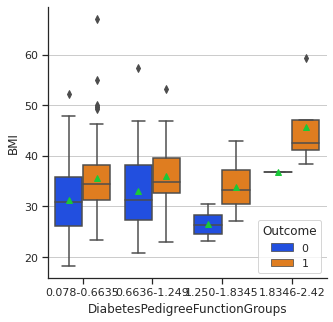

In [105]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="DiabetesPedigreeFunctionGroups", y="BMI", hue="Outcome", data=df, showmeans=True)

sns.despine(offset=0)

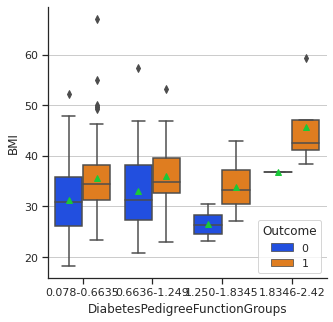

In [106]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="DiabetesPedigreeFunctionGroups", y="BMI", hue="Outcome", data=df, showmeans=True)

sns.despine(offset=0)

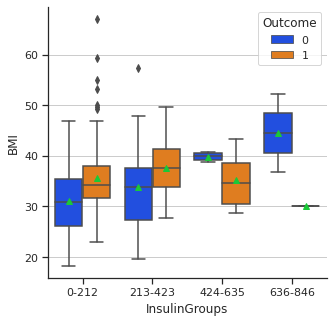

In [107]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="InsulinGroups", y="BMI", hue="Outcome", data=df, showmeans=True)
sns.despine(offset=0)

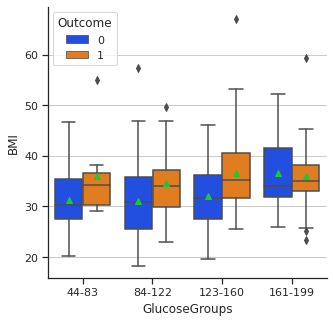

In [108]:
sns.set_theme(style="ticks", palette="bright")
plt.figure(figsize=(5,5))
plt.grid()
sns.boxplot(x="GlucoseGroups", y="BMI", hue="Outcome", data=df, showmeans=True)
sns.despine(offset=0)

In [109]:
model = ols('BMI ~ C(BloodPressureGroups) + C(InsulinGroups) + C(BloodPressureGroups):C(InsulinGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df             F  \
C(BloodPressureGroups)                   1.900193e+03    3.0  1.497857e+01   
C(InsulinGroups)                         3.578269e-11    3.0  2.820626e-13   
C(BloodPressureGroups):C(InsulinGroups)  1.295555e+03    9.0  3.404136e+00   
Residual                                 2.194692e+04  519.0           NaN   

                                               PR(>F)  
C(BloodPressureGroups)                   2.301487e-09  
C(InsulinGroups)                         1.000000e+00  
C(BloodPressureGroups):C(InsulinGroups)  4.445236e-04  
Residual                                          NaN

In [110]:
model = ols('BMI ~ C(BloodPressureGroups) + C(GlucoseGroups) + C(BloodPressureGroups):C(GlucoseGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

#None have a statistically significant effect on BMI & no interaction effect between Pregnancies & Glucose

sum_sq     df          F  \
C(BloodPressureGroups)                    1607.896111    3.0  12.578422   
C(GlucoseGroups)                           348.298971    3.0   2.724711   
C(BloodPressureGroups):C(GlucoseGroups)    863.963615    9.0   2.252902   
Residual                                 22029.320759  517.0        NaN   

                                               PR(>F)  
C(BloodPressureGroups)                   5.995428e-08  
C(GlucoseGroups)                         4.363468e-02  
C(BloodPressureGroups):C(GlucoseGroups)  1.777349e-02  
Residual                                          NaN

In [111]:
model = ols('BMI ~ C(BloodPressureGroups) + C(InsulinGroups) + C(BloodPressureGroups):C(GlucoseGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
  warnings.warn('covariance of constraints does not have full '


sum_sq     df          F  \
C(BloodPressureGroups)                    2553.387765    3.0  20.143647   
C(InsulinGroups)                           311.285237    3.0   2.455726   
C(BloodPressureGroups):C(GlucoseGroups)    830.212969   12.0   1.637385   
Residual                                 21718.035522  514.0        NaN   

                                               PR(>F)  
C(BloodPressureGroups)                   3.781346e-09  
C(InsulinGroups)                         6.231335e-02  
C(BloodPressureGroups):C(GlucoseGroups)  8.495693e-02  
Residual                                          NaN

In [112]:
model = ols('BMI ~ C(DiabetesPedigreeFunctionGroups) + C(InsulinGroups) + C(DiabetesPedigreeFunctionGroups):C(InsulinGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

#DPF & Insulin Groups each have a statistically significant effect on BMI & no interaction effect between them.

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '


sum_sq     df  \
C(DiabetesPedigreeFunctionGroups)                     911.573678    3.0   
C(InsulinGroups)                                     1826.688126    3.0   
C(DiabetesPedigreeFunctionGroups):C(InsulinGroups)    608.380222    9.0   
Residual                                            23106.721383  520.0   

                                                            F    PR(>F)  
C(DiabetesPedigreeFunctionGroups)                    6.838101  0.009182  
C(InsulinGroups)                                    13.702764  0.000237  
C(DiabetesPedigreeFunctionGroups):C(InsulinGroups)   1.521239  0.181402  
Residual                                                  NaN       NaN

In [113]:
df['DiabetesPedigreeFunctionGroups'] = df['DiabetesPedigreeFunctionGroups'].astype(str)
df['InsulinGroups'] = df['InsulinGroups'].astype(str)

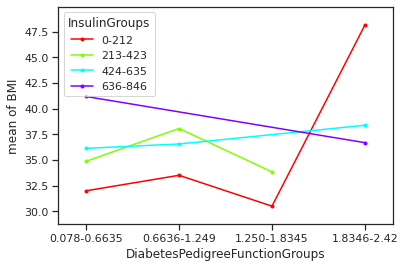

In [114]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(df['DiabetesPedigreeFunctionGroups'], df['InsulinGroups'], df['BMI'])

In [115]:
model = ols('BMI ~ C(DiabetesPedigreeFunctionGroups) + C(GlucoseGroups) + C(DiabetesPedigreeFunctionGroups):C(GlucoseGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

#DPF & Glucose Groups each have a statistically significant effect on BMI & no interaction effect between them.

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


sum_sq     df  \
C(DiabetesPedigreeFunctionGroups)                     362.182999    3.0   
C(GlucoseGroups)                                     1186.271828    3.0   
C(DiabetesPedigreeFunctionGroups):C(GlucoseGroups)    646.411580    9.0   
Residual                                            22923.841272  518.0   

                                                           F    PR(>F)  
C(DiabetesPedigreeFunctionGroups)                   2.728030  0.066287  
C(GlucoseGroups)                                    8.935222  0.000153  
C(DiabetesPedigreeFunctionGroups):C(GlucoseGroups)  1.622964  0.115420  
Residual                                                 NaN       NaN

In [116]:
df['DiabetesPedigreeFunctionGroups'] = df['DiabetesPedigreeFunctionGroups'].astype(str)
df['GlucoseGroups'] = df['GlucoseGroups'].astype(str)

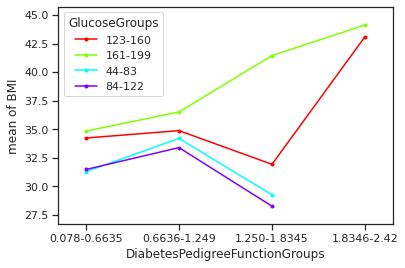

In [117]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(df['DiabetesPedigreeFunctionGroups'], df['GlucoseGroups'], df['BMI'])

In [118]:
model = ols('BMI ~ C(DiabetesPedigreeFunctionGroups) + C(BloodPressureGroups) + C(DiabetesPedigreeFunctionGroups):C(BloodPressureGroups)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '


sum_sq     df  \
C(DiabetesPedigreeFunctionGroups)                    1315.433331    3.0   
C(BloodPressureGroups)                               1864.370668    3.0   
C(DiabetesPedigreeFunctionGroups):C(BloodPressu...    216.105859    9.0   
Residual                                            22173.426115  518.0   

                                                            F        PR(>F)  
C(DiabetesPedigreeFunctionGroups)                   10.243410  4.335735e-05  
C(BloodPressureGroups)                              14.518039  7.332829e-07  
C(DiabetesPedigreeFunctionGroups):C(BloodPressu...   0.560946  8.100273e-01  
Residual                                                  NaN           NaN

In [119]:
#ANCOVA

In [127]:
from pingouin import ancova

In [139]:
ancova(data=df, dv='BMI', covar='DiabetesPedigreeFunction', between='Insulin')

Source            SS   DF         F     p-unc       np2
0                   Insulin   8933.882072  184  1.074507  0.283827  0.363630
1  DiabetesPedigreeFunction    165.279853    1  3.657687  0.056636  0.010461
2                  Residual  15634.695319  346       NaN       NaN       NaN

In [140]:
ancova(data=df, dv='BMI', covar='DiabetesPedigreeFunction', between='Glucose')

Source            SS   DF         F     p-unc       np2
0                   Glucose   6705.258555  125  1.216181  0.080844  0.272920
1  DiabetesPedigreeFunction    212.045711    1  4.807534  0.028904  0.011731
2                  Residual  17863.318835  405       NaN       NaN       NaN

In [141]:
#LINEAR REGRESSION

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


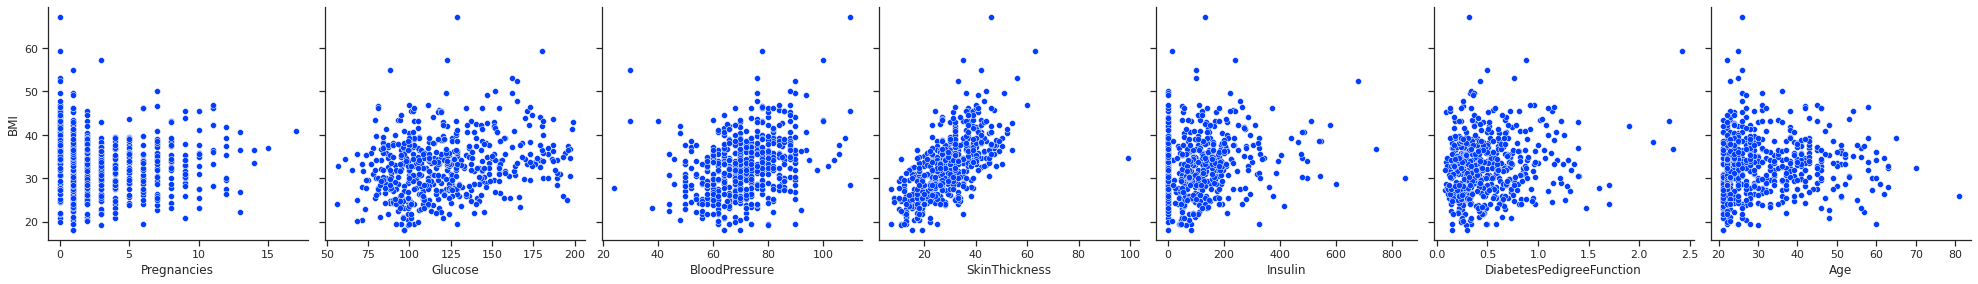

In [152]:
sns.pairplot(df, x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'], 
             y_vars='BMI', size=4, aspect=1, kind='scatter')
plt.show()

In [153]:
x = df['Pregnancies'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

7.355260790475882e-05

In [144]:
x = df['Glucose'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.06104817750100333

In [145]:
x = df['BloodPressure'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.09446826637629646

In [146]:
x = df['SkinThickness'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.4191557462783363

In [147]:
x = df['Insulin'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.03654505143064812

In [148]:
x = df['DiabetesPedigreeFunction'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.02283336661237445

In [149]:
x = df['Age'].array.reshape(-1,1)
y = df['BMI'].array.reshape(-1,1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.005393177649999581

In [ ]:
#MULTIPLE LINEAR REGRESSION

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [235]:
attributes = ['Insulin','Glucose','DiabetesPedigreeFunction']

In [236]:
for s in attributes:
    x = df[s].array.reshape(-1,1)
    y = df['BMI'].array.reshape(-1,1)

In [237]:
x = df[['Insulin','Glucose','DiabetesPedigreeFunction']]
y = df['BMI']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=None)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

dfattributes = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfattributes

Actual  Predicted
763    32.9  32.161675
28     22.2  33.465982
384    24.3  32.708391
527    26.3  32.194010
202    27.3  32.274450
588    33.3  36.126697
460    20.8  32.946424
217    30.0  33.106901
751    39.0  32.418271
441    32.2  31.241225
381    20.0  31.389335
208    33.2  31.625874
320    27.5  33.962475
85     32.4  32.921882
607    19.5  31.495345
741    30.8  32.038669
662    37.6  34.827450
240    29.2  30.820687
385    22.3  32.132477
186    30.1  37.447721
647    37.8  35.266941
187    32.0  34.075834
710    31.2  35.559177
3      28.1  31.239842
162    44.2  33.214895
510    29.7  30.715349
746    49.3  33.081187
161    37.2  31.824080
174    29.7  30.800750
669    30.9  33.621482
270    45.6  32.512993
14     25.8  35.072188
194    24.4  30.524633
369    32.8  33.184336
553    29.9  31.282842
236    35.9  35.708870
204    37.7  32.505721
425    37.0  35.839957
434    24.5  32.117740
89     26.5  31.361648
285    26.0  33.846942
144    32.8  34.755481
730    28.4  32.859365
275    40.5  32.149337
103    26.6  30.811209
693    38.5  33.244440
618    28.2  33.116830
121    34.2  31.640290
629    24.7  30.867241
43     45.4  35.806235
211    42.8  33.105146
623    43.5  31.792148
185    35.9  35.327458
95     33.9  34.105147
545    34.5  35.845017
657    38.9  34.357994
679    24.2  33.262346
214    34.2  32.657159
740    42.3  33.546476
52     24.4  31.052413
469    46.1  34.419242
685    33.2  33.906972
544    32.0  31.381834
547    33.1  33.153369
225    34.6  30.727007
736    27.4  33.214966
515    31.6  34.121769
223    28.8  34.428660
633    27.5  33.076649
118    28.2  31.391563
631    34.5  31.787939
128    34.5  32.871521
455    33.6  33.888697
445    59.4  37.259930
181    34.9  33.100701
313    29.5  32.704818
312    26.6  34.014369
671    25.4  31.616149
424    42.9  34.625435
38     38.2  31.222805
617    20.1  30.164020
389    31.6  32.667173
764    36.8  32.151110
462    35.3  31.203070
34     27.6  32.393517
585    22.5  31.210166
244    38.2  34.091283
538    36.3  34.162806
109    37.4  31.244694
580    42.1  33.244262
282    32.4  33.307856
600    27.1  31.729033
638    40.9  32.504717
480    35.5  35.297605
403    31.6  30.257130
413    26.2  33.134518
18     43.3  31.707386
755    36.5  33.995169
205    23.9  31.847464
50     19.4  32.135861
666    32.5  32.835461
257    28.7  31.512085
608    41.5  34.662365
698    34.5  33.564266
279    25.3  33.964811
416    27.2  32.310457
414    34.6  33.939387

In [239]:
metrics.mean_absolute_error(y_test, y_pred)

5.2089922771695845

In [240]:
metrics.mean_squared_error(y_test, y_pred)

43.64717457927721

In [241]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

6.606600833959716

In [242]:
regressor.score(x_test,y_test)

0.11389701614249226

In [243]:
attributes = ['Insulin','Glucose']

In [244]:
for s in attributes:
    x = df[s].array.reshape(-1,1)
    y = df['BMI'].array.reshape(-1,1)

In [245]:
x = df[['Insulin','Glucose']]
y = df['BMI']

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=None)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

dfattributes = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfattributes

Actual  Predicted
135    33.8  33.497317
661    42.9  36.520221
38     38.2  31.273469
440    34.3  36.038867
275    40.5  31.974318
680    24.2  29.810153
595    32.0  36.703129
267    40.0  33.102612
114    30.5  35.316832
448    33.6  32.193814
526    18.2  31.926181
742    28.5  32.634733
500    25.2  32.846529
613    32.5  31.995499
150    37.4  34.273257
348    21.8  31.991646
487    46.5  36.289163
751    39.0  33.050623
668    34.0  32.390203
421    26.0  31.758671
525    21.8  31.129063
477    23.8  32.852304
476    33.7  32.731001
209    35.5  35.798191
466    27.8  30.641932
205    23.9  32.284311
188    27.9  32.627031
133    38.3  30.984657
459    25.9  33.622471
569    34.3  33.401046
111    34.0  36.308410
323    26.8  34.369533
588    33.3  36.013832
422    40.6  32.151455
187    32.0  33.325958
358    35.3  31.385141
659    34.2  31.061671
607    19.5  31.527622
262    32.1  31.514145
746    49.3  34.017183
719    35.6  31.610416
639    19.5  31.931959
83     24.6  31.802958
328    45.5  32.313188
457    30.2  31.354334
35     24.0  32.638581
727    32.4  33.728371
334    23.9  31.737492
330    23.1  32.621258
672    35.5  30.403180
538    36.3  33.863143
320    27.5  34.040281
228    36.7  39.288942
141    39.5  32.043634
31     31.6  35.490117
346    28.7  33.951716
51     24.2  31.941586
307    24.8  34.105747
765    26.2  33.196953
498    25.1  36.886045
89     26.5  32.091770
623    43.5  31.908852
80     22.4  32.380582
126    42.9  33.237386
159    40.9  35.226339
582    26.5  32.765664
452    39.9  32.130271
325    25.6  35.145470
288    20.8  31.750970
424    42.9  35.018391
277    27.8  32.394056
285    26.0  34.007552
96     31.6  31.369739
259    33.3  34.979885
565    26.1  31.853016
671    25.4  31.706687
290    36.9  30.849877
225    34.6  31.252288
419    26.4  33.593588
575    35.5  32.911994
200    31.0  32.380582
491    33.5  31.225333
181    34.9  33.023667
368    27.5  31.094403
649    26.4  32.091770
312    26.6  34.771942
603    35.2  34.646789
493    28.9  33.428003
471    33.2  33.535830
385    22.3  32.861933
34     27.6  32.813800
442    33.2  33.035218
412    42.4  35.018388
50     19.4  32.214993
599    23.1  32.650136
549    28.5  36.038867
716    33.8  35.981099
656    21.8  32.149529
73     35.1  34.190462
311    39.4  32.613552
77     37.7  31.514145
171    35.4  33.892027
436    37.4  33.680236
486    40.7  35.480482
273    33.2  30.532183
405    42.1  33.497316
134    21.1  31.750970

In [247]:
metrics.mean_absolute_error(y_test, y_pred)

5.836276066338552

In [248]:
metrics.mean_squared_error(y_test, y_pred)

47.015867619457346

In [249]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

6.856811767830392

In [250]:
regressor.score(x_test,y_test)


0.011832920263260993

In [252]:
from statsmodels.stats.power import TTestIndPower


In [253]:
effect_size = 0.8
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


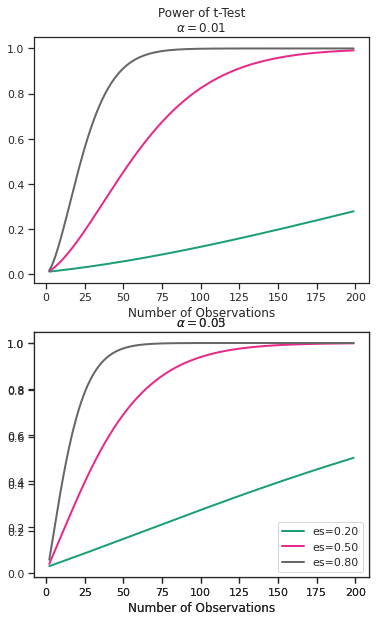

In [259]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
fig.subplots_adjust(top = 2)

ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)